In [34]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix

In [11]:
data_filepath = "data/ratings.csv"

df = pd.read_csv(data_filepath)
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [15]:
user_arr = df["userId"].values
print(user_arr.shape)
print(min(user_arr))
print(max(user_arr))
user_arr = np.unique(user_arr)
print(user_arr.shape)

# User ids are ordered and consecutive starting from 1

(100004,)
1
671
(671,)


In [18]:
movie_arr = df["movieId"].values
print(movie_arr.shape)
print(min(movie_arr))
print(max(movie_arr))
movie_arr = np.unique(movie_arr)
print(movie_arr.shape)
# Movie Ids are problematic

(100004,)
1
163949
(9066,)
[     1      2      3 ... 162542 162672 163949]


In [33]:
df["rating"].values.max()

5.0

In [23]:
movie_id_to_order = np.zeros(movie_arr.max() + 1, dtype=int)
movie_id_to_order[movie_arr] = range(movie_arr.shape[0])

(163950,)
(9066,)


array([   0,    0,    1, ...,    0,    0, 9065])

In [46]:
no_of_user = user_arr.shape[0]
no_of_item = movie_arr.shape[0]
user_item_matrix = csr_matrix((no_of_user, no_of_item))
df_by_user = df.groupby("userId")
for user_id, group in df_by_user:
  user_item_matrix[user_id - 1, movie_id_to_order[group.movieId.values]] = group.rating.values
  
print(user_item_matrix)

/Users/shathra/Desktop/workspace/env/lib/python3.6/site-packages/scipy/sparse/compressed.py:742: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


  (0, 30)	2.5
  (0, 833)	3.0
  (0, 859)	3.0
  (0, 906)	2.0
  (0, 931)	4.0
  (0, 1017)	2.0
  (0, 1041)	2.0
  (0, 1047)	2.0
  (0, 1083)	3.5
  (0, 1087)	2.0
  (0, 1111)	2.5
  (0, 1140)	1.0
  (0, 1515)	4.0
  (0, 1665)	4.0
  (0, 1708)	3.0
  (0, 1743)	2.0
  (0, 1815)	2.0
  (0, 1962)	2.5
  (0, 2380)	1.0
  (0, 2925)	3.0
  (1, 9)	4.0
  (1, 16)	5.0
  (1, 37)	5.0
  (1, 45)	4.0
  (1, 48)	4.0
  :	:
  (670, 3810)	5.0
  (670, 3845)	4.5
  (670, 3854)	4.5
  (670, 3869)	5.0
  (670, 3871)	4.0
  (670, 3882)	2.0
  (670, 3999)	2.0
  (670, 4051)	3.0
  (670, 4081)	4.0
  (670, 4098)	4.0
  (670, 4135)	4.5
  (670, 4147)	3.0
  (670, 4255)	4.0
  (670, 4321)	4.0
  (670, 4367)	3.5
  (670, 4391)	5.0
  (670, 4412)	4.0
  (670, 4413)	4.5
  (670, 4417)	4.0
  (670, 4507)	2.5
  (670, 4545)	2.5
  (670, 4546)	4.0
  (670, 4597)	4.0
  (670, 4610)	2.5
  (670, 4696)	3.5


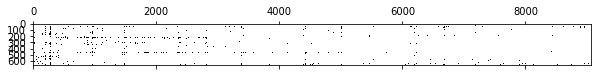

In [55]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 10)
plt.spy(user_item_matrix.todense())
plt.show()

In [58]:
import scipy.sparse

matrix = scipy.sparse.load_npz("user_item_matrix.npz")
print(matrix)

  (0, 30)	2.5
  (0, 833)	3.0
  (0, 859)	3.0
  (0, 906)	2.0
  (0, 931)	4.0
  (0, 1017)	2.0
  (0, 1041)	2.0
  (0, 1047)	2.0
  (0, 1083)	3.5
  (0, 1087)	2.0
  (0, 1111)	2.5
  (0, 1140)	1.0
  (0, 1515)	4.0
  (0, 1665)	4.0
  (0, 1708)	3.0
  (0, 1743)	2.0
  (0, 1815)	2.0
  (0, 1962)	2.5
  (0, 2380)	1.0
  (0, 2925)	3.0
  (1, 9)	4.0
  (1, 16)	5.0
  (1, 37)	5.0
  (1, 45)	4.0
  (1, 48)	4.0
  :	:
  (670, 3810)	5.0
  (670, 3845)	4.5
  (670, 3854)	4.5
  (670, 3869)	5.0
  (670, 3871)	4.0
  (670, 3882)	2.0
  (670, 3999)	2.0
  (670, 4051)	3.0
  (670, 4081)	4.0
  (670, 4098)	4.0
  (670, 4135)	4.5
  (670, 4147)	3.0
  (670, 4255)	4.0
  (670, 4321)	4.0
  (670, 4367)	3.5
  (670, 4391)	5.0
  (670, 4412)	4.0
  (670, 4413)	4.5
  (670, 4417)	4.0
  (670, 4507)	2.5
  (670, 4545)	2.5
  (670, 4546)	4.0
  (670, 4597)	4.0
  (670, 4610)	2.5
  (670, 4696)	3.5
